In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/energy_data.csv")
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [4]:
df['Building Type'].value_counts()

Building Type
Residential    40
Industrial     34
Commercial     26
Name: count, dtype: int64

In [5]:
df['Building Type'].replace({"Residential":0,"Industrial":1,"Commercial":2},inplace=True)

In [6]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,0,24563,15,4,28.52,Weekday,2865.57
1,2,27583,56,23,23.07,Weekend,4283.80
2,2,45313,4,44,33.56,Weekday,5067.83
3,0,41625,84,17,27.39,Weekend,4624.30
4,0,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,2,1161,81,11,15.45,Weekend,3010.81
96,0,37943,50,23,21.73,Weekend,4248.49
97,2,1558,27,29,16.86,Weekend,2843.60
98,1,2145,56,12,11.77,Weekend,3348.39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    int64  
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.6+ KB


In [8]:
df['Day of Week'].value_counts()

Day of Week
Weekend    56
Weekday    44
Name: count, dtype: int64

In [9]:
df['Day of Week'].replace({"Weekend":0,"Weekday":1},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    int64  
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    int64  
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 5.6 KB


In [11]:
df.corr()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
Building Type,1.000000,0.113565,0.004292,-0.023305,-0.061214,-0.021146,0.384368
Square Footage,0.113565,1.000000,-0.080458,-0.145933,0.030612,0.202413,0.724039
Number of Occupants,0.004292,-0.080458,1.000000,0.034320,-0.063608,-0.014976,0.308594
Appliances Used,-0.023305,-0.145933,0.034320,1.000000,-0.136386,0.072980,0.176380
Average Temperature,-0.061214,0.030612,-0.063608,-0.136386,1.000000,0.143007,-0.079733
Day of Week,-0.021146,0.202413,-0.014976,0.072980,0.143007,1.000000,0.169386
Energy Consumption,0.384368,0.724039,0.308594,0.176380,-0.079733,0.169386,1.000000


<Axes: >

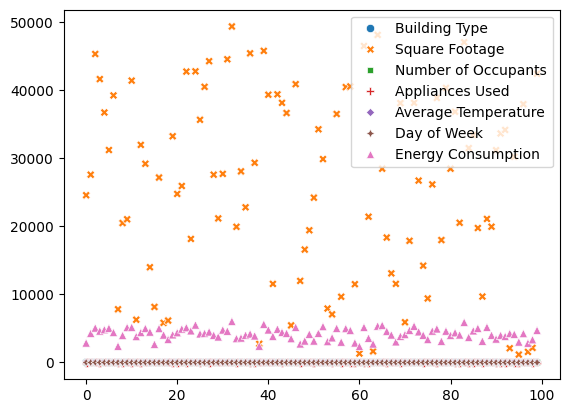

In [12]:
sns.scatterplot(df)

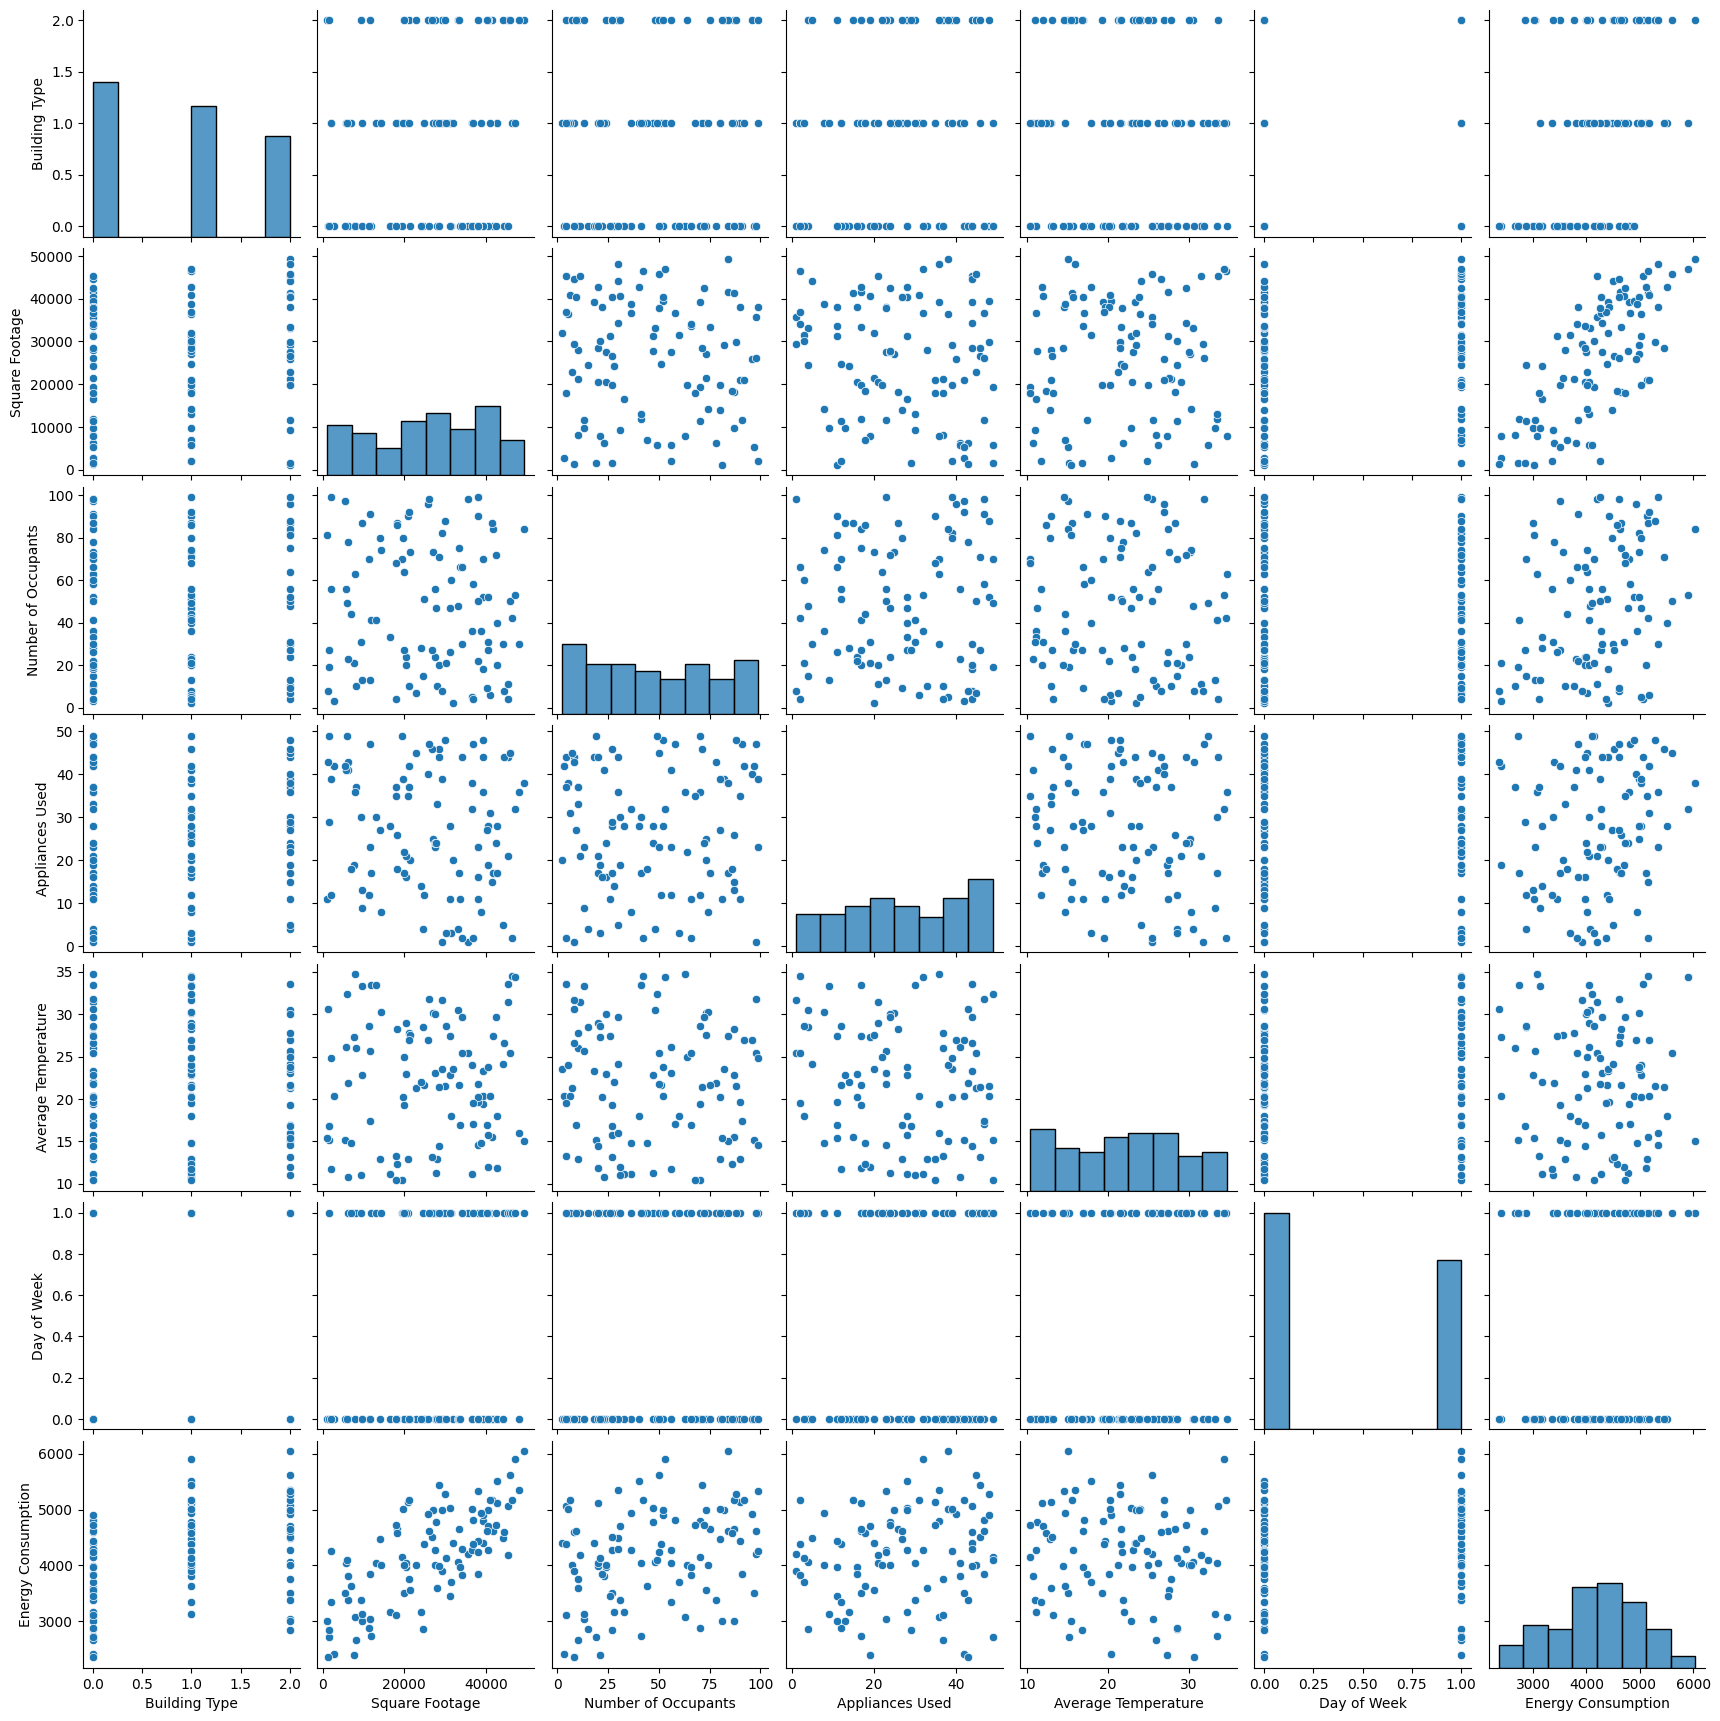

In [13]:
sns.pairplot(df)

In [14]:
x = df.drop(['Energy Consumption'],axis=1)
y = df['Energy Consumption']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=0, shuffle=True)

In [16]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred_train = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train ,y_pred_train)
print("MSE :",mse) # squared unit

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train ,y_pred_train)
print("MAE :",mae)

R2 = r2_score(y_train ,y_pred_train)
print('r_squared :',R2)

n = x_train.shape[0] # no of rows
k = x_train.shape[1] # no of columns
adj_r2 = 1 - (((1-R2)*(n-1))/(n-k-1))
print("Adjusted R2 Value: ", adj_r2)

MSE : 102710.07684615799
RMSE : 320.48412885220694
MAE : 281.3570091643944
r_squared : 0.8334664693551598
Adjusted R2 Value:  0.756604839826772


In [18]:
# Testing Data Evaluation
y_pred_test = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test ,y_pred_test)
print("MSE :",mse) # squared unit

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test ,y_pred_test)
print("MAE :",mae)

R2 = r2_score(y_test ,y_pred_test)
print('r_squared :',R2)

n = x_test.shape[0] # no of rows
k = x_test.shape[1] # no of columns
adj_r2 = 1 - (((1-R2)*(n-1))/(n-k-1))
print("Adjusted R2 Value: ", adj_r2)

MSE : 208571.28702252408
RMSE : 456.6960554050408
MAE : 399.045601409731
r_squared : 0.6849942818916339
Adjusted R2 Value:  0.6591034009512202


In [19]:
x.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week'],
      dtype='object')

In [20]:
label_enc_data = {'Building Type':{"Residential":0,"Industrial":1,"Commercial":2},'Day of Week':{"Weekend":0,"Weekday":1}}
label_enc_data

{'Building Type': {'Residential': 0, 'Industrial': 1, 'Commercial': 2},
 'Day of Week': {'Weekend': 0, 'Weekday': 1}}

In [21]:
column_names = list(x_train.columns)
print(column_names)

['Building Type', 'Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Day of Week']


In [22]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

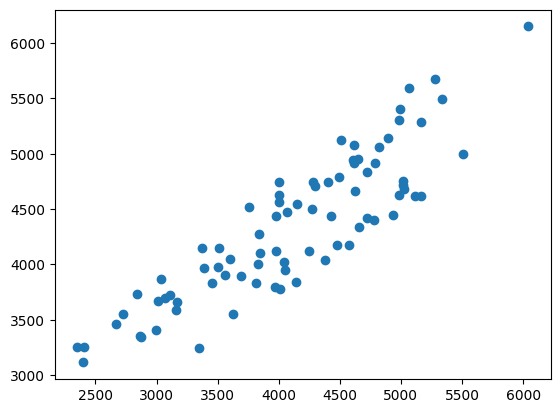

In [23]:
plt.scatter(y_test,y_pred_test)

In [24]:
linear_reg_model.predict(x_test[45:46])

array([3459.38060603])

In [25]:
linear_reg_model.predict(x_test.iloc[[48]])

array([3258.79312089])

In [26]:
Building_Type = "Residential"
Square_Footage = 2457
Number_of_Occupants = 12
Appliances_Used = 5
Average_Temperature = 35.3
Day_of_Week = "Weekend"
# Day_of_Week = "Weekday"

In [27]:
test_array = np.zeros((1,x_train.shape[1]))

test_array[0][0] = label_enc_data['Building Type'][Building_Type]
test_array[0][1] = Square_Footage
test_array[0][2] = Number_of_Occupants
test_array[0][3] = Appliances_Used
test_array[0][4] = Average_Temperature
test_array[0][5] = label_enc_data['Day of Week'][Day_of_Week]
test_array

array([[   0. , 2457. ,   12. ,    5. ,   35.3,    0. ]])

In [28]:
linear_reg_model.predict(test_array)

array([2466.01130979])

In [47]:
with open("Artifacts/linear_regression.pkl","wb") as f:
    pickle.dump(linear_reg_model, f)

In [48]:
label_enc_data = {'Building Type':{"Residential":0,"Industrial":1,"Commercial":2},'Day of Week':{"Weekend":0,"Weekday":1}}
with open('Artifacts/label_enc_data.json', 'w') as f:
    json.dump(label_enc_data,f)

In [49]:
linear_reg_model.feature_names_in_

array(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week'],
      dtype=object)

In [29]:
df.to_csv('processed_energy_data.csv', index=False)

print("Data saved to processed_energy_data.csv successfully!")

Data saved to processed_energy_data.csv successfully!
